In [37]:
from tsputil import *
from gurobipy import *
from collections import OrderedDict
from itertools import chain, combinations # For the powerset

%run ./tsputil.py 
%matplotlib inline

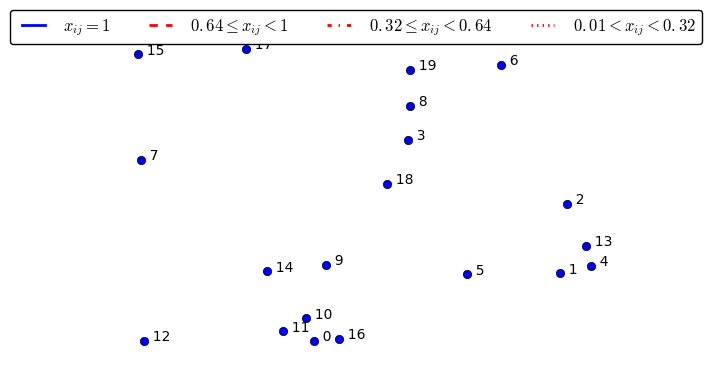

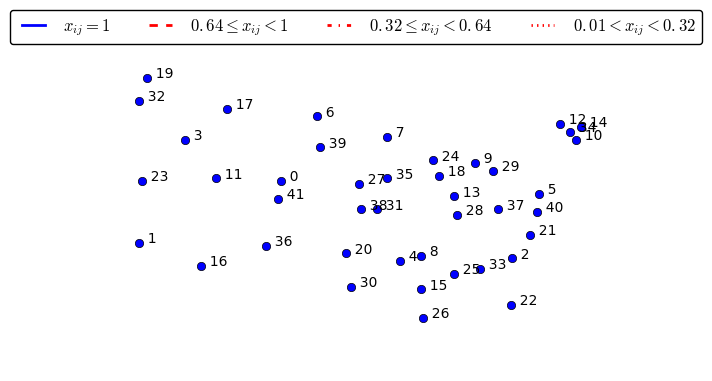

In [83]:
ran_points = Cities(n = 20, seed = "different seed")
plot_situation(ran_points)

dantzig42 = read_instance("dantzig42.dat")
plot_situation(dantzig42)


# Task 1

Changed value of parameter Presolve to 0
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter Method to 0
   Prev: -1  Min: -1  Max: 4  Default: -1
Changed value of parameter MIPGap to 1e-07
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 65534 rows, 120 columns and 1966200 nonzeros
Variable types: 0 continuous, 120 integer (120 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 7e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 5585.92
Variable types: 0 continuous, 120 integer (120 binary)

Root relaxation: objective 2.504687e+03, 41 iterations, 0.19 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 2504.68744    0    8 5585.91998 2504.68744  55.2%     -    0s
H    0     0                    2945.7681994 2504.68744  15

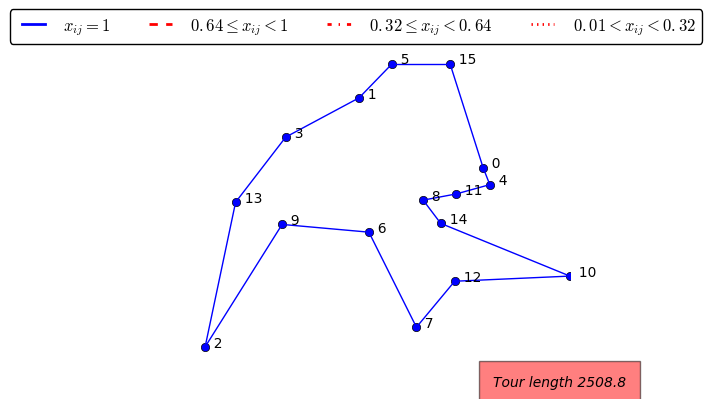

In [58]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def Edges(vertices):
    """Takes a set of vertices and returns a set of edges from those vertices. 
    Also edges should be ordered by ij if i < j or ji if j < i"""
    # Every vertex is connected to each other, so therefore we can construct the edges like this
    E = [(i,j) for i in vertices for j in vertices if i<j]
    return E

def delta(v, V):
    """The set of edges in the cut (v, V∖{v})"""
    E = [(i,j) for i in v for j in V if i<j]
    D = [(j,i) for i in v for j in V if j<i]
    return E+D

def solve_tsp(points, subtours=[]):
    points=list(points)
    V = range(len(points))
    E = [(i,j) for i in V for j in V if i<j]
    E = tuplelist(E)

    m = Model("TSP0")
    m.setParam(GRB.param.Presolve, 0)
    m.setParam(GRB.param.Method, 0)
    m.setParam(GRB.param.MIPGap,1e-7)

    ######### BEGIN: Write here your model for Task 1   

    # Decision Variables
    tmp = []
    
    roads = {}
    for (a,b) in E:
        road = m.addVar(lb=0, ub=1, vtype=GRB.BINARY, name="road"+str((a,b)))
        roads[(a,b)] = road
        tmp += [road * distance(points[a], points[b])]

    # Set the objective function
    m.setObjective( quicksum(tmp), GRB.MINIMIZE )
      
    # Constraint to make sure we have exactly 2 roads for each city
    for i in V:
        m.addConstr( quicksum( roads[(a,b)] for (a,b) in delta([i], V) ), GRB.EQUAL, 2, name="c1_"+str(i)+str((a,b)))
     
    # Creating the subset of cities
    subset = list(powerset(range(len(ran_points))))
    # The first element of the list is the empty set and the last element is the full set, hence we remove them.
    subset = subset[1:(len(subset)-1)]
    
    # Constraint to remove subtours
    for i in subset:
        if len(i) < 2:
            continue
        m.addConstr( quicksum( roads[(a,b)] for (a,b) in Edges(i)) <= len(i) - 1 )
    

    
    
    ######### END
    
    m.optimize()
    m.write("tsplp.lp")
    
    if m.status == GRB.status.OPTIMAL:
        print('The optimal objective is %g' % m.objVal)
        m.write("tsplp.sol") # write the solution
        #for (a,b) in E:
        #    if roads[(a,b)].x == 1.0:
        #        plt.plot([points[a].real, points[b].real],[points[b].imag, points[b].imag], "k-")
        return {(i,j) : roads[(i,j)].x for i,j in E}
    else:
        print "Something wrong in solve_tsplp"
        exit(0)

tsplp0 = solve_tsp(ran_points, [])
plot_situation(ran_points, tsplp0)

# Task 2

Changed value of parameter Presolve to 0
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter Method to 0
   Prev: -1  Min: -1  Max: 4  Default: -1
Changed value of parameter MIPGap to 1e-07
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 20 rows, 190 columns and 380 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.7818219e+03   3.000000e+00   3.260494e+08      0s
      54    2.6867798e+03   0.000000e+00   0.000000e+00      0s

Solved in 54 iterations and 0.01 seconds
Optimal objective  2.686779752e+03
The optimal objective is 2686.78


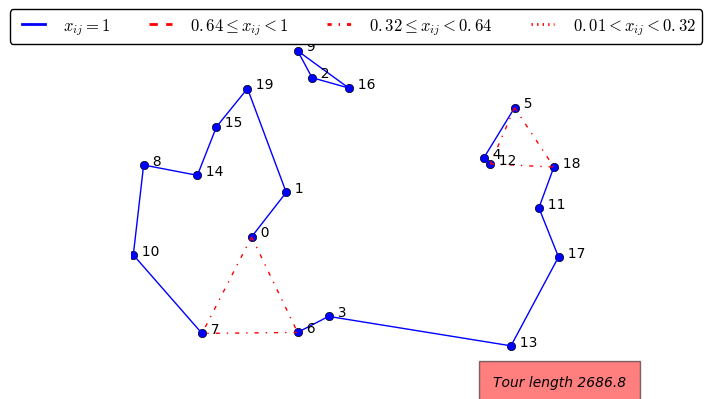

In [64]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def Edges(vertices):
    """Takes a set of vertices and returns a set of edges from those vertices. 
    Also edges should be ordered by ij if i < j or ji if j < i"""
    # Every vertex is connected to each other, so therefore we can construct the edges like this
    E = [(i,j) for i in vertices for j in vertices if i<j]
    return E

def delta(v, V):
    """The set of edges in the cut (v, V∖{v})"""
    E = [(i,j) for i in v for j in V if i<j]
    D = [(j,i) for i in v for j in V if j<i]
    return E+D

def solve_tsp(points, subtours=[]):
    points=list(points)
    V = range(len(points))
    E = [(i,j) for i in V for j in V if i<j]
    E = tuplelist(E)

    m = Model("TSP0")
    m.setParam(GRB.param.Presolve, 0)
    m.setParam(GRB.param.Method, 0)
    m.setParam(GRB.param.MIPGap,1e-7)

    ######### BEGIN: Write here your model for Task 1   

    # Decision Variables
    tmp = []
    
    roads = {}
    for (a,b) in E:
        road = m.addVar(lb=0, ub=1, name="road"+str((a,b)))
        roads[(a,b)] = road
        tmp += [road * distance(points[a], points[b])]

    # Set the objective function
    m.setObjective( quicksum(tmp), GRB.MINIMIZE )
      
    # Constraint to make sure we have exactly 2 roads for each city
    for i in V:
        m.addConstr( quicksum( roads[(a,b)] for (a,b) in delta([i], V) ), GRB.EQUAL, 2, name="c1_"+str(i)+str((a,b)))
    
    ######### END
    
    m.optimize()
    m.write("tsplp.lp")
    
    if m.status == GRB.status.OPTIMAL:
        print('The optimal objective is %g' % m.objVal)
        m.write("tsplp.sol") # write the solution
        return {(i,j) : roads[(i,j)].x for i,j in E}
    else:
        print "Something wrong in solve_tsplp"
        exit(0)

tsplp0 = solve_tsp(ran_points, [])
plot_situation(ran_points, tsplp0)

Not all variables are integer. The matrix is not TUM since some variables are in between 0 and 1. No. Since we removed the constraint that removes subtours, we can expext subtours to occur.

# Task 3

Changed value of parameter Presolve to 0
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter Method to 0
   Prev: -1  Min: -1  Max: 4  Default: -1
Changed value of parameter MIPGap to 1e-07
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 22 rows, 190 columns and 389 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 3e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3062784e+03   1.000000e+00   3.055025e+06      0s
      80    3.0452090e+03   0.000000e+00   0.000000e+00      0s

Solved in 80 iterations and 0.01 seconds
Optimal objective  3.045208999e+03
The optimal objective is 3045.21


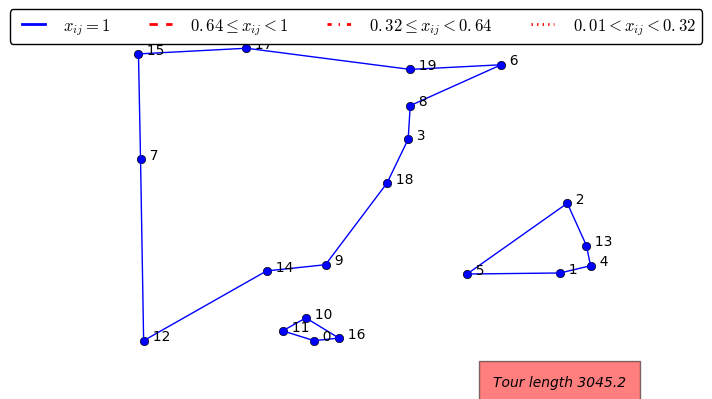

In [97]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def Edges(vertices):
    """Takes a set of vertices and returns a set of edges from those vertices. 
    Also edges should be ordered by ij if i < j or ji if j < i"""
    # Every vertex is connected to each other, so therefore we can construct the edges like this
    E = [(i,j) for i in vertices for j in vertices if i<j]
    return E

def delta(v, V):
    """The set of edges in the cut (v, V∖{v})"""
    E = [(i,j) for i in v for j in V if i<j]
    D = [(j,i) for i in v for j in V if j<i]
    return E+D

def solve_tsp(points, subtours=[]):
    points=list(points)
    V = range(len(points))
    E = [(i,j) for i in V for j in V if i<j]
    E = tuplelist(E)

    m = Model("TSP0")
    m.setParam(GRB.param.Presolve, 0)
    m.setParam(GRB.param.Method, 0)
    m.setParam(GRB.param.MIPGap,1e-7)

    ######### BEGIN: Write here your model for Task 1   

    # Decision Variables
    tmp = []
    
    roads = {}
    for (a,b) in E:
        road = m.addVar(lb=0, ub=1, name="road"+str((a,b)))
        roads[(a,b)] = road
        tmp += [road * distance(points[a], points[b])]

    # Set the objective function
    m.setObjective( quicksum(tmp), GRB.MINIMIZE )
      
    # Constraint to make sure we have exactly 2 roads for each city
    for i in V:
        m.addConstr( quicksum( roads[(a,b)] for (a,b) in delta([i], V) ), GRB.EQUAL, 2, name="c1_"+str(i)+str((a,b)))
        
    # Go through list of subtours
    for i in subtours:
        if len(i) < 2:
            continue
        m.addConstr( quicksum( roads[(a,b)] for (a,b) in Edges(i)) <= len(i) - 1 )
    
    
    ######### END
    
    m.optimize()
    m.write("tsplp.lp")
    
    if m.status == GRB.status.OPTIMAL:
        print('The optimal objective is %g' % m.objVal)
        m.write("tsplp.sol") # write the solution
        return {(i,j) : roads[(i,j)].x for i,j in E}
    else:
        print "Something wrong in solve_tsplp"
        exit(0)

tsplp0 = solve_tsp(ran_points, [(7,15,17),(1,2,4,13),(1,)])
plot_situation(ran_points, tsplp0)